<a href="https://colab.research.google.com/github/SDS-AAU/IntroStat/blob/master/Notebooks/mini_l%C3%B8sning_aflevering1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Minimalløsning AS E2020 - Aflevering 1

# 1

In [1]:
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_excel('https://sds-aau.github.io/IntroStat/Data/kickstarter.xlsx' )

# 2

In [3]:
data.head()

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,0,2079338443,"Totem: the premium, full-featured Virtual Real...",Hardware,Technology,CAD,2014-10-15,350000.0,2014-09-16 17:45:29,181643.0,canceled,472,CA,163733.65,161575.34,311332.5
1,1,645559618,Hawaiian style shirts that provide clean water...,Apparel,Fashion,USD,2016-11-13,25000.0,2016-10-14 14:50:26,25574.0,successful,139,US,4861.00,25574.00,25000.0
2,2,1158384038,WOD CUSTOMS,Apparel,Fashion,USD,2016-12-03,2000.0,2016-11-05 03:38:28,74.0,canceled,2,US,54.00,74.00,2000.0
3,3,1817514428,c - a science fiction short film,Shorts,Film & Video,USD,2010-09-24,8000.0,2010-08-21 10:13:28,565.0,failed,15,US,565.00,565.00,8000.0
4,4,642039479,"Finding the Treasure of El Angel Bueno, a Docu...",Documentary,Film & Video,USD,2016-12-02,45000.0,2016-10-18 04:19:05,89.0,canceled,2,US,50.00,89.00,45000.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10000 non-null  int64  
 1   ID                10000 non-null  int64  
 2   name              9999 non-null   object 
 3   category          10000 non-null  object 
 4   main_category     10000 non-null  object 
 5   currency          10000 non-null  object 
 6   deadline          10000 non-null  object 
 7   goal              10000 non-null  float64
 8   launched          10000 non-null  object 
 9   pledged           10000 non-null  float64
 10  state             10000 non-null  object 
 11  backers           10000 non-null  int64  
 12  country           10000 non-null  object 
 13  usd pledged       9906 non-null   float64
 14  usd_pledged_real  10000 non-null  float64
 15  usd_goal_real     10000 non-null  float64
dtypes: float64(5), int64(3), object(8)
memory

In [5]:
data = data.dropna()

# eller mere elgant:
# data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9905 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9905 non-null   int64  
 1   ID                9905 non-null   int64  
 2   name              9905 non-null   object 
 3   category          9905 non-null   object 
 4   main_category     9905 non-null   object 
 5   currency          9905 non-null   object 
 6   deadline          9905 non-null   object 
 7   goal              9905 non-null   float64
 8   launched          9905 non-null   object 
 9   pledged           9905 non-null   float64
 10  state             9905 non-null   object 
 11  backers           9905 non-null   int64  
 12  country           9905 non-null   object 
 13  usd pledged       9905 non-null   float64
 14  usd_pledged_real  9905 non-null   float64
 15  usd_goal_real     9905 non-null   float64
dtypes: float64(5), int64(3), object(8)
memory 

# 3

In [21]:
# A
data.main_category.nunique()

# eller:
# len(data.main_category.unique())
# eller:
# data.main_category.value_counts().shape
# eller
# len(data.main_category.value_counts())
# eller manuelt

15

In [25]:
# A

data.main_category.value_counts()[:10]

Film & Video    1658
Music           1318
Publishing      1109
Games            891
Technology       825
Design           825
Art              725
Fashion          649
Food             623
Theater          291
Name: main_category, dtype: int64

In [8]:
# B

data.country.value_counts()

# DK har 21 - det er nok som løsning

US    7697
GB     901
CA     378
AU     209
DE      99
IT      83
FR      82
NL      72
ES      62
MX      57
SE      57
CH      36
NZ      34
IE      24
BE      21
DK      21
HK      19
AT      19
SG      18
NO      14
LU       1
JP       1
Name: country, dtype: int64

In [9]:
# C

data.goal.mean()

46113.649758707725

In [28]:
# C

data.groupby('main_category').goal.mean().sort_values(ascending=False)[:10]

main_category
Technology      184027.635152
Games            63505.478126
Film & Video     57723.758088
Art              54739.469862
Design           34654.609697
Journalism       33699.439655
Food             33289.866774
Theater          33136.381375
Dance            20103.650485
Publishing       17538.330929
Name: goal, dtype: float64

In [29]:
# D
data.groupby('main_category').goal.median().sort_values(ascending=False)[:10]

main_category
Technology      20000.0
Games           10000.0
Food            10000.0
Design          10000.0
Film & Video     7000.0
Journalism       5550.0
Publishing       5000.0
Fashion          5000.0
Music            3622.5
Theater          3500.0
Name: goal, dtype: float64

De fleste projekter søger noget omkring 20k i funding. Men der må være en del outliers med store beløb, som driver gennemsnit op.

In [12]:
# E
data.backers.describe()

count     9905.000000
mean       100.590409
std        665.198688
min          0.000000
25%          2.000000
50%         11.000000
75%         54.000000
max      33741.000000
Name: backers, dtype: float64

In [30]:
# BONUS 
iqr = data.backers.quantile(0.75) - data.backers.quantile(0.25)
data.backers.quantile(0.75) + 1.5*iqr

132.0

Gennemsnitlig har projekter 100 støtter. Men værdien er ikke repræsentativ for de fleste projekter pga. en højreskæv fordeling. De fleste projekter vil typisk have mellem 2 og 54 støtter. 
Projekter med mere end 132 støtter kan betragtes som outliers og atypiske.

# 4

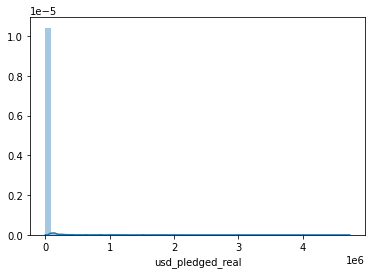

In [13]:
# A
sns.distplot(data.usd_pledged_real)

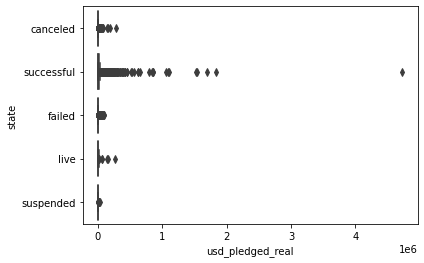

In [14]:
# B
sns.boxplot(data = data, y='state', x= 'usd_pledged_real')

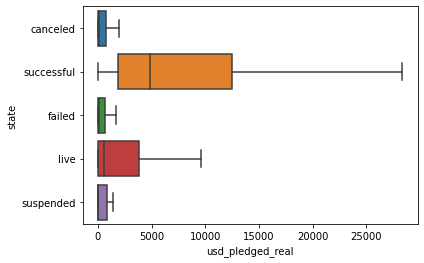

In [15]:
# IKKE EN DEL AF OPGAVEN men nice til næste gange (tak til dem af jer, der viste mig det her).
sns.boxplot(data = data, y='state', x= 'usd_pledged_real', showfliers = False)

In [35]:
#C
data_filter = data[data.usd_pledged_real < data.usd_pledged_real.quantile(q=0.90)]

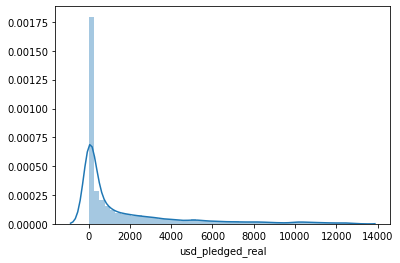

In [36]:
sns.distplot(data_filter.usd_pledged_real)

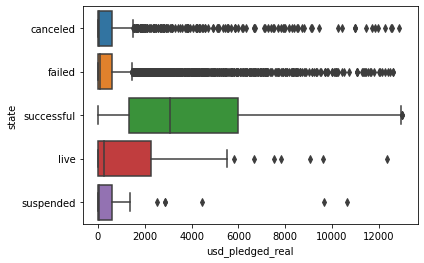

In [37]:
sns.boxplot(data = data_filter, y='state', x= 'usd_pledged_real')

Projekter, der kom igennem, ser ud til at arbejde med nogle mindre og måske mere realistiske budgetter (op til 6k USD)
Projekter i failed og canceled har tit fået mange penge men det kan være, at de havde søgt langt flere penge. At undersøge dette ville krave at se på indtægter ift deres forventninger og de forskellige resultater (state)
